<a href="https://colab.research.google.com/github/galenzo17/AI-personal-test/blob/main/credit_risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Instalando dependencias...
Dependencias instaladas.
Configurando Kaggle para descargar el conjunto de datos...
Por favor, suba su archivo 'kaggle.json' para autenticar con Kaggle.


Saving kaggle.json to kaggle (1).json
Configuración de Kaggle completada.
Descargando el conjunto de datos desde Kaggle...
Dataset URL: https://www.kaggle.com/datasets/laotse/credit-risk-dataset
License(s): CC0-1.0
credit-risk-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Conjunto de datos descargado.
Descomprimiendo el conjunto de datos...
Archive:  credit-risk-dataset.zip
replace credit_risk_dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: credit_risk_dataset.csv  
Conjunto de datos descomprimido.
Importando librerías...
Librerías importadas.
Cargando conjunto de datos...
Conjunto de datos cargado.
Primeras filas del conjunto de datos:
   person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0

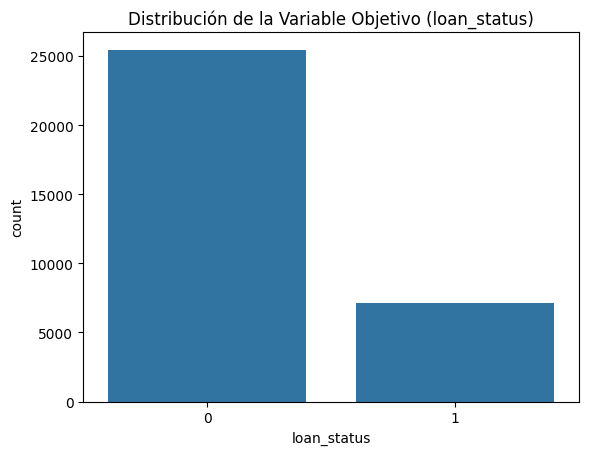

Preprocesando los datos...
Verificando valores faltantes...
person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64
Eliminando filas con valores faltantes...
Valores faltantes eliminados.
Codificando variables categóricas...
Variables categóricas codificadas.
Normalizando los datos...
Datos normalizados.
Guardando el escalador...
Escalador guardado como 'scaler.pkl'.
Dividiendo los datos en conjunto de entrenamiento y prueba...
Datos divididos.
Entrenando el modelo de regresión logística...
Modelo entrenado.
Evaluando el modelo...
Métricas de evaluación:
              precision    recall  f1-score   support

       

<ipython-input-2-78a8bc0ef330>:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
<ipython-input-2-78a8bc0ef330>:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
<ipython-input-2-78a8bc0ef330>:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

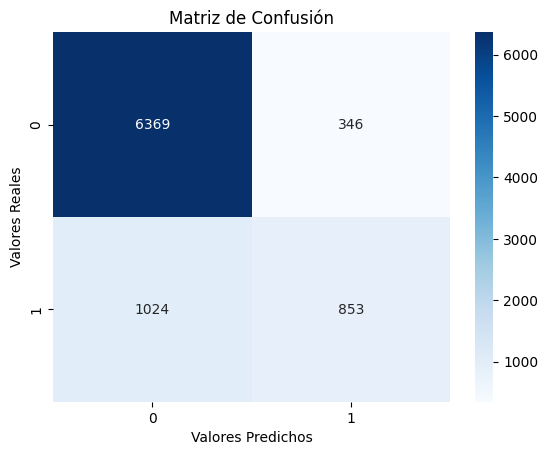

Probando el modelo con nuevos datos...
Predicción para el nuevo dato: Cumplimiento
Guardando el modelo...
Modelo guardado como 'modelo_riesgo_crediticio.pkl'.
¡Proceso completado!


In [2]:
# 1. Instalación de dependencias
print("Instalando dependencias...")
!pip install --upgrade scikit-learn pandas matplotlib seaborn tensorflow kaggle joblib
print("Dependencias instaladas.")

# 2. Configuración de Kaggle para descargar el conjunto de datos
print("Configurando Kaggle para descargar el conjunto de datos...")
import os
from google.colab import files

# Subir el archivo kaggle.json
print("Por favor, suba su archivo 'kaggle.json' para autenticar con Kaggle.")
uploaded = files.upload()

# Crear la carpeta .kaggle y mover el archivo kaggle.json
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
print("Configuración de Kaggle completada.")

# Descarga del conjunto de datos desde Kaggle
print("Descargando el conjunto de datos desde Kaggle...")
!kaggle datasets download -d laotse/credit-risk-dataset
print("Conjunto de datos descargado.")

# Descomprimir el conjunto de datos
print("Descomprimiendo el conjunto de datos...")
!unzip credit-risk-dataset.zip
print("Conjunto de datos descomprimido.")

# 3. Importación de librerías
print("Importando librerías...")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print("Librerías importadas.")

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score
import joblib

# Paso 1: Cargar el conjunto de datos
print("Cargando conjunto de datos...")
df = pd.read_csv('credit_risk_dataset.csv')
print("Conjunto de datos cargado.")

# Visualizar las primeras filas del conjunto de datos
print("Primeras filas del conjunto de datos:")
print(df.head())

# Paso 2: Análisis exploratorio de datos
print("Realizando análisis exploratorio de datos...")
print("Información del DataFrame:")
print(df.info())

print("Estadísticas descriptivas:")
print(df.describe())

# Visualización de la distribución de la variable objetivo
print("Visualizando la distribución de la variable objetivo...")
sns.countplot(x='loan_status', data=df)
plt.title('Distribución de la Variable Objetivo (loan_status)')
plt.show()

# Paso 3: Preprocesamiento de los datos
print("Preprocesando los datos...")

# Verificar si hay valores faltantes
print("Verificando valores faltantes...")
print(df.isnull().sum())

# Manejo de valores faltantes (si los hay)
print("Eliminando filas con valores faltantes...")
df = df.dropna()
print("Valores faltantes eliminados.")

# Codificación de variables categóricas
print("Codificando variables categóricas...")
categorical_cols = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']

# Usando LabelEncoder para convertir variables categóricas a numéricas
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

print("Variables categóricas codificadas.")

# Separar características (X) y etiqueta (y)
X = df.drop('loan_status', axis=1)
y = df['loan_status']

# Normalizar los datos
print("Normalizando los datos...")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Datos normalizados.")

# Guardar el escalador para uso futuro en la API
print("Guardando el escalador...")
joblib.dump(scaler, 'scaler.pkl')
print("Escalador guardado como 'scaler.pkl'.")

# Paso 4: División de los datos en conjunto de entrenamiento y prueba
print("Dividiendo los datos en conjunto de entrenamiento y prueba...")
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
print("Datos divididos.")

# Paso 5: Entrenamiento del modelo de regresión logística
print("Entrenando el modelo de regresión logística...")
model = LogisticRegression()
model.fit(X_train, y_train)
print("Modelo entrenado.")

# Paso 6: Evaluación del modelo
print("Evaluando el modelo...")
y_pred = model.predict(X_test)
print("Métricas de evaluación:")
print(classification_report(y_test, y_pred))

# Cálculo de precisión, recall y F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Precisión: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

# Paso 7: Generación de la matriz de confusión
print("Generando matriz de confusión...")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Valores Predichos')
plt.ylabel('Valores Reales')
plt.show()

# Paso 8: Probando el modelo con nuevos datos (ejemplo)
print("Probando el modelo con nuevos datos...")
sample_data = X_test[0].reshape(1, -1)
sample_prediction = model.predict(sample_data)
print("Predicción para el nuevo dato:", "Incumplimiento" if sample_prediction[0] == 1 else "Cumplimiento")

# Paso 9: Guardado del modelo
print("Guardando el modelo...")
joblib.dump(model, 'modelo_riesgo_crediticio.pkl')
print("Modelo guardado como 'modelo_riesgo_crediticio.pkl'.")

print("¡Proceso completado!")


In [ ]:
# Solicitar datos al usuario
print("Ingrese los siguientes datos para realizar una predicción:")

# Definir los nombres de las características
feature_names = X.columns.tolist()

# Crear un diccionario para almacenar los datos del usuario
user_data = {}

for feature in feature_names:
    if feature in categorical_cols:
        # Si es una variable categórica, mostrar las clases posibles
        classes = df[feature].unique()
        print(f"Valores posibles para {feature}: {classes}")
        value = int(input(f"Ingrese el valor para {feature} (utilice los números indicados): "))
    else:
        value = float(input(f"Ingrese el valor para {feature}: "))
    user_data[feature] = value

# Convertir los datos del usuario a un DataFrame
user_df = pd.DataFrame(user_data, index=[0])

# Escalar los datos del usuario
user_scaled = scaler.transform(user_df)

# Realizar la predicción
user_prediction = model.predict(user_scaled)

print("La predicción del modelo para los datos ingresados es:", "Incumplimiento" if user_prediction[0] == 1 else "Cumplimiento")


Ingrese los siguientes datos para realizar una predicción:
Ingrese el valor para person_age: 39
Ingrese el valor para person_income: 3000
Valores posibles para person_home_ownership: [3 2 0 1]
Ingrese el valor para person_home_ownership (utilice los números indicados): 0
Ingrese el valor para person_emp_length: 1
Valores posibles para loan_intent: [4 1 3 5 2 0]
Ingrese el valor para loan_intent (utilice los números indicados): 0
Valores posibles para loan_grade: [3 1 2 0 4 5 6]
Ingrese el valor para loan_grade (utilice los números indicados): 0
Ingrese el valor para loan_amnt: 5000
Ingrese el valor para loan_int_rate: 2
Ingrese el valor para loan_percent_income: 30
Valores posibles para cb_person_default_on_file: [1 0]
Ingrese el valor para cb_person_default_on_file (utilice los números indicados): 0
Ingrese el valor para cb_person_cred_hist_length: 0
La predicción del modelo para los datos ingresados es: Incumplimiento


Implementando un modelo de red neuronal profunda...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Entrenando el modelo de red neuronal...
Epoch 1/50
627/627 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7462 - loss: 0.5198 - val_accuracy: 0.8411 - val_loss: 0.3682
Epoch 2/50
627/627 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8402 - loss: 0.3868 - val_accuracy: 0.8503 - val_loss: 0.3539
Epoch 3/50
627/627 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8490 - loss: 0.3671 - val_accuracy: 0.8542 - val_loss: 0.3465
Epoch 4/50
627/627 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8569 - loss: 0.3585 - val_accuracy: 0.8607 - val_loss: 0.3383
Epoch 5/50
627/627 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8635 - loss: 0.3457 - val_accuracy: 0.8610 - val_loss: 0.3346
Epoch 6/50
627/627 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8659 - loss: 0.3346 - val_accuracy: 0.8641 - val_loss: 0.3294
Epoch 7/50
627/627 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8672 - loss: 0.3413 - val_accuracy: 0.8682 - val_loss: 0.3232
Epoch 8/50
627/627 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 

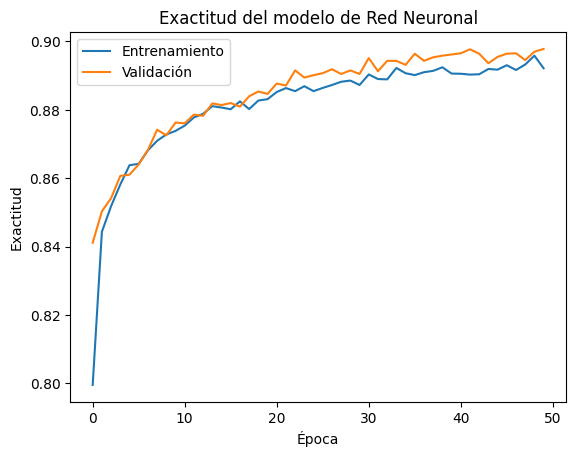

Realizando predicción con el modelo de red neuronal...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
La predicción de la red neuronal para los datos ingresados es: Incumplimiento


In [ ]:
print("Implementando un modelo de red neuronal profunda...")

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Paso 1: Construir el modelo
model_nn = Sequential()
model_nn.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model_nn.add(Dropout(0.5))
model_nn.add(Dense(32, activation='relu'))
model_nn.add(Dropout(0.5))
model_nn.add(Dense(1, activation='sigmoid'))

# Paso 2: Compilar el modelo
model_nn.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Paso 3: Entrenar el modelo
print("Entrenando el modelo de red neuronal...")
history = model_nn.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Paso 4: Evaluar el modelo
print("Evaluando el modelo de red neuronal...")
loss, accuracy = model_nn.evaluate(X_test, y_test)
print(f"Exactitud en el conjunto de prueba: {accuracy*100:.2f}%")

# Paso 5: Visualizar el historial de entrenamiento
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Exactitud del modelo de Red Neuronal')
plt.ylabel('Exactitud')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Validación'], loc='upper left')
plt.show()

# Paso 6: Predicción con el modelo de red neuronal
print("Realizando predicción con el modelo de red neuronal...")
user_nn_prediction = model_nn.predict(user_scaled)
print("La predicción de la red neuronal para los datos ingresados es:", "Incumplimiento" if user_nn_prediction[0][0] >= 0.5 else "Cumplimiento")


Instalando dependencias...
Dependencias instaladas.
Importando librerías...
Librerías importadas.
Importación de librerías de Transformers completada.
Cargando conjunto de datos...
Conjunto de datos cargado.
Primeras filas del conjunto de datos:
   person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15

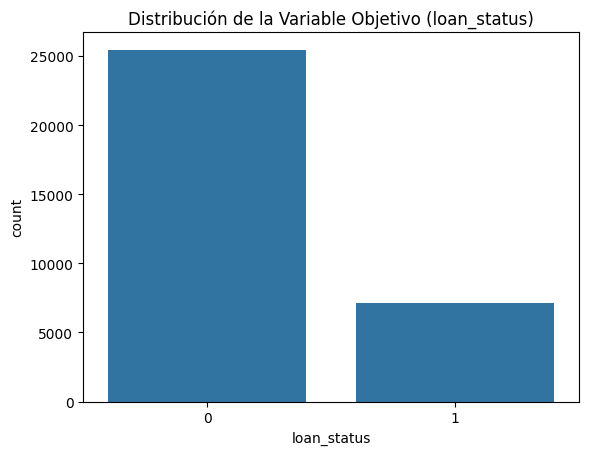

Preprocesando los datos...
Verificando valores faltantes...
person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64
Eliminando filas con valores faltantes...
Valores faltantes eliminados.
Preparando datos para el modelo de lenguaje...
Creando prompts para el modelo de lenguaje...
Dividiendo los datos en conjunto de entrenamiento y prueba...
Datos divididos.
Cargando el modelo de lenguaje abierto...
Modelo de lenguaje cargado.
Realizando predicciones en el conjunto de prueba...
Procesando muestra 1/20
Procesando muestra 2/20
Procesando muestra 3/20
Procesando muestra 4/20
Procesando muestra 5/20
Procesando muestra 6/

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


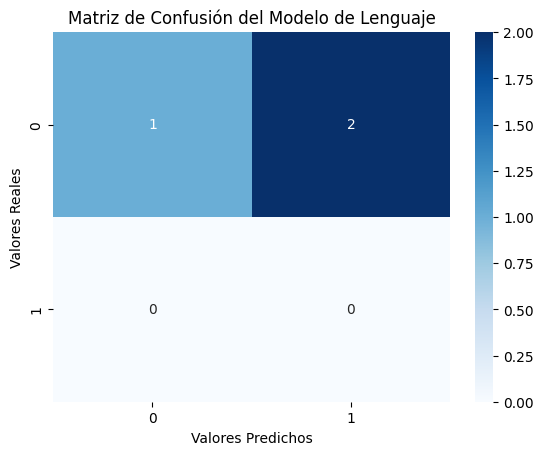

In [ ]:
# Instalación de dependencias
print("Instalando dependencias...")
!pip install --upgrade scikit-learn pandas matplotlib seaborn transformers datasets
print("Dependencias instaladas.")

# Importación de librerías
print("Importando librerías...")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print("Librerías importadas.")

from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from transformers import pipeline, AutoTokenizer, AutoModelForCausalLM
import torch
print("Importación de librerías de Transformers completada.")

# Paso 1: Cargar el conjunto de datos
print("Cargando conjunto de datos...")
df = pd.read_csv('credit_risk_dataset.csv')
print("Conjunto de datos cargado.")

# Visualizar las primeras filas del conjunto de datos
print("Primeras filas del conjunto de datos:")
print(df.head())

# Paso 2: Análisis exploratorio de datos
print("Realizando análisis exploratorio de datos...")
print("Información del DataFrame:")
df.info()

print("Estadísticas descriptivas:")
print(df.describe())

# Visualización de la distribución de la variable objetivo
print("Visualizando la distribución de la variable objetivo...")
sns.countplot(x='loan_status', data=df)
plt.title('Distribución de la Variable Objetivo (loan_status)')
plt.show()

# Paso 3: Preprocesamiento de los datos
print("Preprocesando los datos...")

# Verificar si hay valores faltantes
print("Verificando valores faltantes...")
print(df.isnull().sum())

# Manejo de valores faltantes (si los hay)
print("Eliminando filas con valores faltantes...")
df = df.dropna()
print("Valores faltantes eliminados.")

# Preparando datos para el modelo de lenguaje
print("Preparando datos para el modelo de lenguaje...")
categorical_cols = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']

# Paso 4: Crear prompts para el LLM
print("Creando prompts para el modelo de lenguaje...")
def create_prompt(row):
    prompt = f"El cliente de {row['person_age']} años, con un ingreso anual de {row['person_income']}, "
    prompt += f"propiedad de vivienda '{row['person_home_ownership']}', con {row['person_emp_length']} años de empleo, "
    prompt += f"solicita un préstamo para '{row['loan_intent']}' de grado '{row['loan_grade']}', por un monto de {row['loan_amnt']}, "
    prompt += f"con una tasa de interés de {row['loan_int_rate']}%. Su historial de incumplimiento previo es '{row['cb_person_default_on_file']}' "
    prompt += f"y tiene una longitud de historial crediticio de {row['cb_person_cred_hist_length']} años.\n"
    prompt += "¿El cliente incumplirá con el préstamo? Responda 'Sí' o 'No'."
    return prompt

df['prompt'] = df.apply(create_prompt, axis=1)

# Crear las etiquetas correspondientes
def map_label(label):
    return 'Sí' if label == 1 else 'No'

df['label_text'] = df['loan_status'].apply(map_label)

# Paso 5: Dividir los datos en entrenamiento y prueba
print("Dividiendo los datos en conjunto de entrenamiento y prueba...")
X_train, X_test, y_train, y_test = train_test_split(df['prompt'], df['label_text'], test_size=0.2, random_state=42)
print("Datos divididos.")

# Paso 6: Configurar el modelo de lenguaje
print("Cargando el modelo de lenguaje abierto...")
# Usaremos el modelo GPT-2 pequeño para fines ilustrativos
tokenizer = AutoTokenizer.from_pretrained('gpt2')
model = AutoModelForCausalLM.from_pretrained('gpt2')

# Establecer pad_token y eos_token
tokenizer.pad_token = tokenizer.eos_token
model.config.pad_token_id = model.config.eos_token_id

print("Modelo de lenguaje cargado.")

# Configurar el pipeline de generación de texto
generator = pipeline(
    'text-generation',
    model=model,
    tokenizer=tokenizer,
    device=0 if torch.cuda.is_available() else -1
)

# Paso 7: Realizar predicciones con el modelo de lenguaje
print("Realizando predicciones en el conjunto de prueba...")

def predict_llm(prompt):
    # Truncar el prompt si es demasiado largo
    max_prompt_length = 700
    if len(prompt) > max_prompt_length:
        prompt = prompt[:max_prompt_length]

    response = generator(
        prompt,
        max_new_tokens=50,
        num_return_sequences=1,
        pad_token_id=tokenizer.eos_token_id,
        eos_token_id=tokenizer.eos_token_id
    )
    generated_text = response[0]['generated_text']
    # Extraer la respuesta generada después del prompt
    generated_part = generated_text[len(prompt):].strip()
    # Buscar 'Sí' o 'No' en la respuesta generada
    if 'Sí' in generated_part:
        return 'Sí'
    elif 'No' in generated_part:
        return 'No'
    else:
        return 'Indeterminado'

# Limitar el número de muestras para acelerar el proceso (opcional)
sample_size = 20  # Ajusta este número según tus recursos
X_test_sample = X_test.reset_index(drop=True)[:sample_size]
y_test_sample = y_test.reset_index(drop=True)[:sample_size]

# Realizar predicciones
predictions = []
for idx, prompt in enumerate(X_test_sample):
    print(f"Procesando muestra {idx+1}/{sample_size}")
    pred = predict_llm(prompt)
    predictions.append(pred)

print("Predicciones completadas.")

# Paso 8: Evaluación del modelo
print("Evaluando el modelo de lenguaje...")

# Mapear las etiquetas a valores numéricos
def label_to_numeric(label):
    if label == 'Sí':
        return 1
    elif label == 'No':
        return 0
    else:
        return -1  # Para indeterminado

y_test_numeric = y_test_sample.apply(label_to_numeric).values
predictions_numeric = [label_to_numeric(pred) for pred in predictions]

# Remover las predicciones indeterminadas
indices_validos = [i for i, pred in enumerate(predictions_numeric) if pred != -1]
y_test_final = y_test_numeric[indices_validos]
predictions_final = [predictions_numeric[i] for i in indices_validos]

# Verificar si hay predicciones válidas
if len(predictions_final) > 0:
    # Calcular métricas
    precision = precision_score(y_test_final, predictions_final)
    recall = recall_score(y_test_final, predictions_final)
    f1 = f1_score(y_test_final, predictions_final)
    accuracy = np.mean(np.array(predictions_final) == y_test_final)

    print(f"Precisión: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-score: {f1:.2f}")
    print(f"Exactitud: {accuracy*100:.2f}%")

    # Generar la matriz de confusión
    print("Generando matriz de confusión...")
    cm = confusion_matrix(y_test_final, predictions_final)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Matriz de Confusión del Modelo de Lenguaje')
    plt.xlabel('Valores Predichos')
    plt.ylabel('Valores Reales')
    plt.show()
else:
    print("No hay predicciones válidas para evaluar.")
